# EDA for **Bipolarreddit** Before and After Pandemic

## Import packages

In [1]:
import pandas as pd
import numpy as np
import altair as alt
alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

## Import data set

In [2]:
bipolarreddit_pre = pd.read_csv('../../data/bipolarreddit_pre_features_tfidf_256.csv')
bipolarreddit_post = pd.read_csv('../../data/bipolarreddit_post_features_tfidf_256.csv')

## Filter feature of interest: substance_use_total

In [3]:
bipolarreddit_pre  = bipolarreddit_pre  .loc[:, ['subreddit', 'author', 'date', 'post', 'substance_use_total']]
bipolarreddit_post = bipolarreddit_post.loc[:, ['subreddit', 'author', 'date', 'post', 'substance_use_total']]

## Pre-Pandemic data set

In [4]:
bipolarreddit_pre.head(5)

,subreddit,author,date,post,substance_use_total
0,bipolarreddit,onetrueking666,2019/08/04,How to tell a new significant other that you’r...,0
1,bipolarreddit,CapriciousFatal,2019/08/04,How many depressive episodes did you have befo...,0
2,bipolarreddit,planarX,2019/08/04,"Update, additional advice requested: Bipolar g...",0
3,bipolarreddit,i_am_meee,2019/08/04,Think I’m stable but not completely satisfied ...,0
4,bipolarreddit,emobf,2019/08/04,In need of some advice/education on Bipolar di...,0


In [5]:
bipolarreddit_pre.tail(5)

,subreddit,author,date,post,substance_use_total
2715,bipolarreddit,Reddicini,2019/10/25,Just got to sleep. I think I was awake the who...,6
2716,bipolarreddit,taiiigastyle,2019/10/25,Recent Diagnosis of Bipolar Disorder and Presc...,0
2717,bipolarreddit,Kramerade,2019/10/25,Recently started Abilify I’m glad reddit has a...,0
2718,bipolarreddit,clock_project,2019/10/25,Anyone else just end up blaming themselves aft...,1
2719,bipolarreddit,sleeping__forever,2019/10/25,Advice? Is this bipolar? So I'm starting to be...,0


In [6]:
print(f'Total number of records in the pre-pandemic dataset: {len(bipolarreddit_pre)}')

Total number of records in the pre-pandemic dataset: 2720


## Post-Pandemic data set

In [7]:
bipolarreddit_post.head(5)

,subreddit,author,date,post,substance_use_total
0,bipolarreddit,KitsiCode,2020/01/01,My Xanax has almost worn off I say to my fianc...,0
1,bipolarreddit,i_am_meee,2020/01/01,What’s the difference between a personality ty...,0
2,bipolarreddit,beccasueiloveyou,2020/01/01,Latuda Anyone have insight to stopping latuda?...,1
3,bipolarreddit,jibberjabbery,2020/01/01,What my therapist says to do instesd of making...,0
4,bipolarreddit,Lvvvvvv,2020/01/01,Meds stop working Many people report their med...,0


In [8]:
bipolarreddit_post.tail(5)

,subreddit,author,date,post,substance_use_total
1363,bipolarreddit,CorazonSincero,2020/04/20,Hallucinations Y’all ever have hallucinations ...,0
1364,bipolarreddit,bicentennial-man,2020/04/20,"Bipolar Disorder as a teenager? Hello, Bipolar...",0
1365,bipolarreddit,bipolarbear222,2020/04/20,Modafinil Why wouldn’t my doctor want me to sw...,0
1366,bipolarreddit,mrguy12343,2020/04/20,"Time manic/depressed to 'normal' Hi everyone, ...",0
1367,bipolarreddit,bigcat7777777,2020/04/20,I triggered mixed episode for the first time. ...,0


In [9]:
print(f'Total number of records in the post-pandemic dataset: {len(bipolarreddit_post)}')

Total number of records in the post-pandemic dataset: 1368


## High Level Analysis of Pre and Post Pandemic datasets

First we'll combine the two dataset into one--which will make it easier to compare:

In [10]:
bipolarreddit_pre['period'] = 'pre'
bipolarreddit_post['period'] = 'post'

bipolarreddit_df = pd.concat([bipolarreddit_pre, bipolarreddit_post])
bipolarreddit_df

,subreddit,author,date,post,substance_use_total,period
0,bipolarreddit,onetrueking666,2019/08/04,How to tell a new significant other that you’r...,0,pre
1,bipolarreddit,CapriciousFatal,2019/08/04,How many depressive episodes did you have befo...,0,pre
2,bipolarreddit,planarX,2019/08/04,"Update, additional advice requested: Bipolar g...",0,pre
3,bipolarreddit,i_am_meee,2019/08/04,Think I’m stable but not completely satisfied ...,0,pre
4,bipolarreddit,emobf,2019/08/04,In need of some advice/education on Bipolar di...,0,pre
...,...,...,...,...,...,...
1363,bipolarreddit,CorazonSincero,2020/04/20,Hallucinations Y’all ever have hallucinations ...,0,post
1364,bipolarreddit,bicentennial-man,2020/04/20,"Bipolar Disorder as a teenager? Hello, Bipolar...",0,post
1365,bipolarreddit,bipolarbear222,2020/04/20,Modafinil Why wouldn’t my doctor want me to sw...,0,post
1366,bipolarreddit,mrguy12343,2020/04/20,"Time manic/depressed to 'normal' Hi everyone, ...",0,post


In [11]:
pd.concat([bipolarreddit_pre.describe(), bipolarreddit_post.describe()], axis=1)

,substance_use_total,substance_use_total
count,2720.000000,1368.000000
mean,0.487868,0.511696
std,1.145469,1.079778
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,17.000000,13.000000


### Visualization

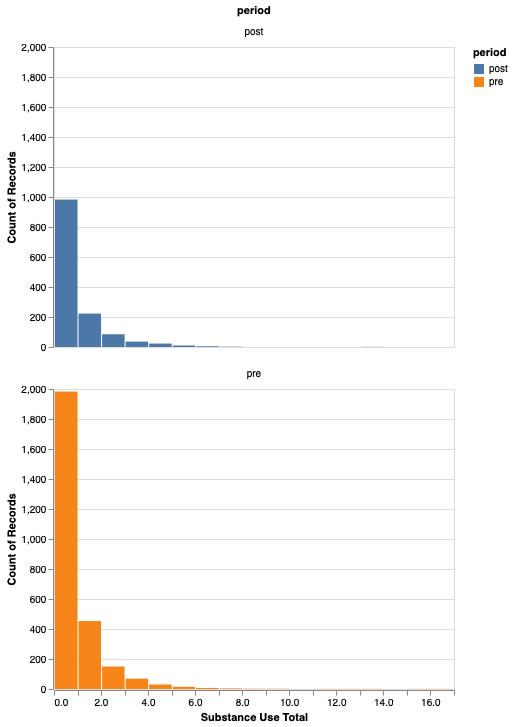

In [12]:
alt.Chart(bipolarreddit_df).mark_bar().encode(
    x=alt.X('substance_use_total', bin=alt.Bin(maxbins=20), title = 'Substance Use Total'),
    y='count()',
    color='period'
).facet('period', columns=1)

In [13]:
print(f"Number of unique authors (posters) in 'pre' dataset: {len(bipolarreddit_pre.author.unique())}")
print(f"Number of unique authors (posters) in 'post' dataset: {len(bipolarreddit_post.author.unique())}")

Number of unique authors (posters) in 'pre' dataset: 2720
Number of unique authors (posters) in 'post' dataset: 1368


1. Every records in the dataset is associated with an unique author
2. The number of unique authors before the pandemic is more than twice compared to after pandemic data
3. The mean of the substance use total before pandemic is slightly slower than after pandemic